# Маска кластеров и вода/суша

In [4]:
from clusters_water_mask import interpolate_mask
import numpy as np
import matplotlib.pyplot as plt


In [22]:
sea='Баренцево'

In [6]:
small_lat = np.load(f'lat_{sea}_small.npy')
small_lon = np.load(f'lon_{sea}_small.npy')

large_lat = np.load('lat_full.npy')
large_lon = np.load('lon_full.npy')
land_water_mask = np.load('land_mask_full.npy')
cluster_mask = np.load('CLUSTERS_full.npy')


small_land_water_mask, small_cluster_mask = interpolate_mask(small_lat, small_lon, large_lat, large_lon, land_water_mask, cluster_mask)

# Детекция аномалий

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def plot_with_mask(data, mask, title, data_cmap='Blues_r', mask_color='green', vmin=None, vmax=None):

    plt.figure(figsize=(10, 8))

    plt.imshow(data, cmap=data_cmap, origin='lower', vmin=vmin, vmax=vmax)
    mask_overlay = np.zeros_like(mask, dtype=float)
    mask_overlay[mask == 0] = 1
    
    cmap = mcolors.ListedColormap([mask_color, 'none'])  
    bounds = [0, 1, 2]  
    norm = mcolors.BoundaryNorm(bounds, cmap.N)
    
    plt.imshow(mask_overlay, cmap=cmap, norm=norm, origin='lower', alpha=0.5, interpolation='none')
    plt.title(title)
    plt.grid(False)
    plt.colorbar(label='Mask Value')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

In [8]:
from anomaly_detection import anomaly_detection

In [23]:
sea='Баренцево'
DATA = np.load(f'data_anom_{sea}_small.npy')
DATA_mask = np.load(f'water_mask_small_{sea}.npy')
clusters = np.load(f'cluster_mask_small_{sea}.npy')
bn_name = f'BN.json'

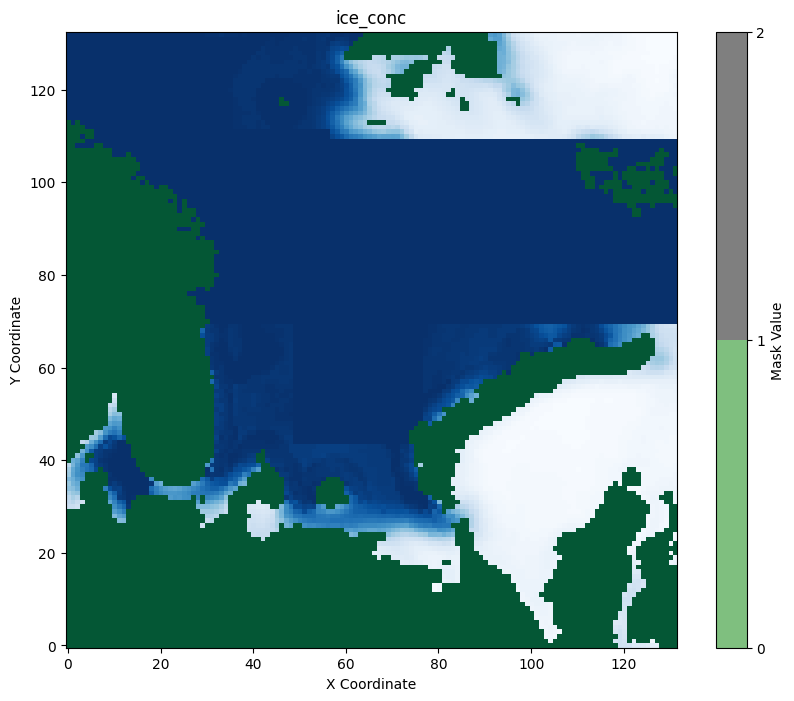

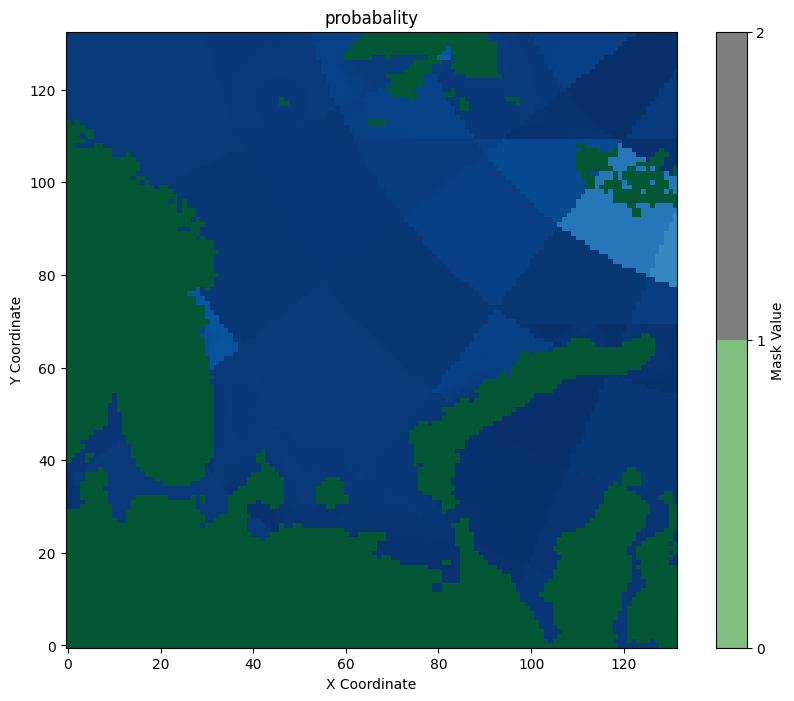

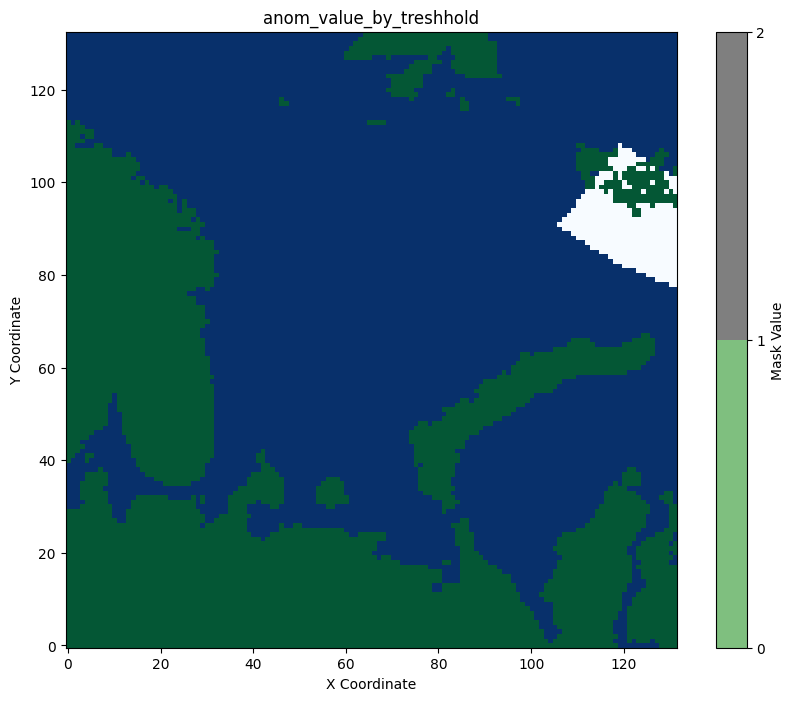

In [24]:
prob_mask, anomaly_mask = anomaly_detection(DATA, bn_name, 1, 0.25, DATA_mask, clusters)

 # Создание альфа-канала для маски
plot_with_mask(DATA, DATA_mask, 'ice_conc', data_cmap='Blues_r', mask_color='green', vmin=0, vmax=100)
plot_with_mask(prob_mask, DATA_mask,'probabality', data_cmap='Blues_r', mask_color='green', vmin=0, vmax=1)
plot_with_mask(anomaly_mask, DATA_mask,'anom_value_by_treshhold',  data_cmap='Blues_r', mask_color='green', vmin=0, vmax=1)

In [17]:
sea='Восточно-Сибирское'
DATA = np.load(f'data_anom_{sea}_small.npy')
DATA_mask = np.load(f'water_mask_small_{sea}.npy')
clusters = np.load(f'cluster_mask_small_{sea}.npy')
bn_name = f'BN.json'

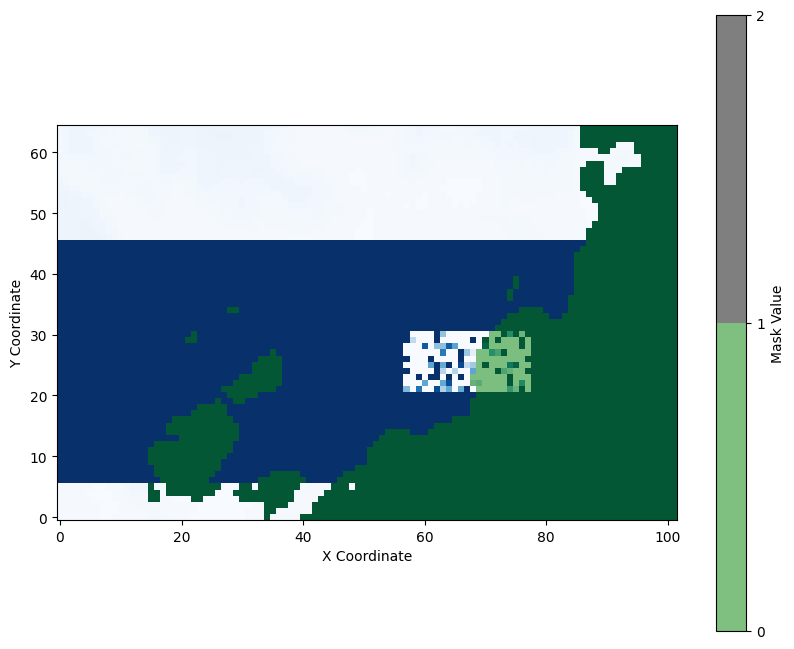

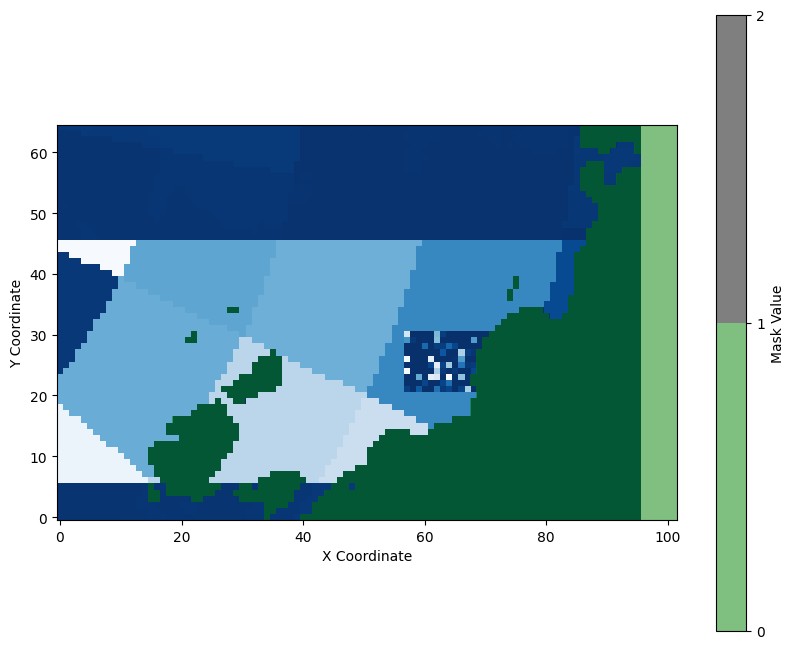

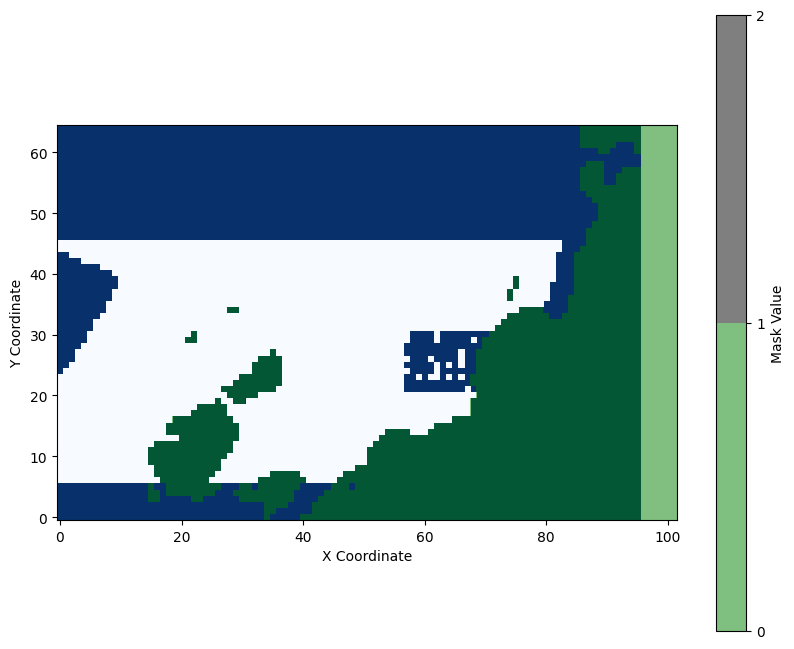

In [18]:
prob_mask, anomaly_mask = anomaly_detection(DATA, bn_name, 1, 0.25, DATA_mask, clusters)

 # Создание альфа-канала для маски
plot_with_mask(DATA, DATA_mask,'ice_conc', data_cmap='Blues_r', mask_color='green', vmin=0, vmax=100)
plot_with_mask(prob_mask, DATA_mask,'probabality',  data_cmap='Blues_r', mask_color='green', vmin=0, vmax=1)
plot_with_mask(anomaly_mask, DATA_mask,'anom_value_by_treshhold', data_cmap='Blues_r', mask_color='green', vmin=0, vmax=1)